# Possum - Feature Selection for independent variables age, head length and sex

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [2]:
df = pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
X_total = df.iloc[:, 1:].values
print(X_total)

[[1 'Vic' 'm' ... 15.2 28.0 36.0]
 [1 'Vic' 'f' ... 16.0 28.5 33.0]
 [1 'Vic' 'f' ... 15.5 30.0 34.0]
 ...
 [7 'other' 'f' ... 13.0 25.0 30.0]
 [7 'other' 'm' ... 15.4 25.0 29.0]
 [7 'other' 'f' ... 14.8 28.5 33.5]]


## Preprocessing - taking care of missing data

In [4]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_total[:, 3:])
X_total[:, 3:] = imputer.transform(X_total[:, 3:])
print(X_total)

[[1 'Vic' 'm' ... 15.2 28.0 36.0]
 [1 'Vic' 'f' ... 16.0 28.5 33.0]
 [1 'Vic' 'f' ... 15.5 30.0 34.0]
 ...
 [7 'other' 'f' ... 13.0 25.0 30.0]
 [7 'other' 'm' ... 15.4 25.0 29.0]
 [7 'other' 'f' ... 14.8 28.5 33.5]]


## Preprocessing - encode categorical data

In [5]:
# encode the columns Pop and sex (binary categorical data - we only need LabelEncoder)
from sklearn.preprocessing import LabelEncoder
le_Pop = LabelEncoder()
X_total[:, 1] = le_Pop.fit_transform(X_total[:, 1])
le_sex = LabelEncoder()
X_total[:, 2] = le_sex.fit_transform(X_total[:, 2])
print(X_total)

[[1 0 1 ... 15.2 28.0 36.0]
 [1 0 0 ... 16.0 28.5 33.0]
 [1 0 0 ... 15.5 30.0 34.0]
 ...
 [7 1 0 ... 13.0 25.0 30.0]
 [7 1 1 ... 15.4 25.0 29.0]
 [7 1 0 ... 14.8 28.5 33.5]]


## Scatter plots for single features and age as dependent variable

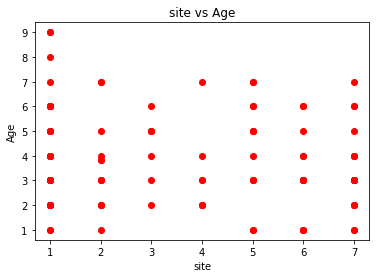

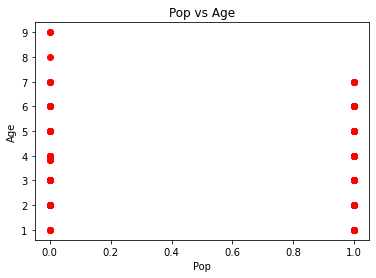

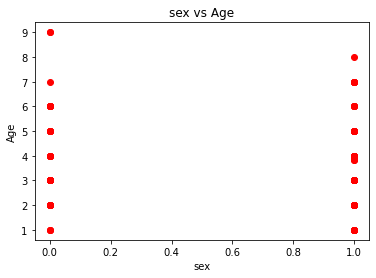

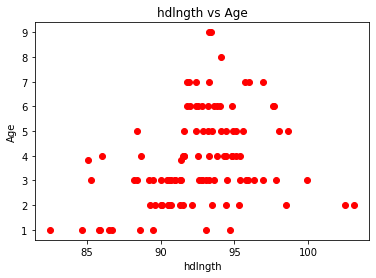

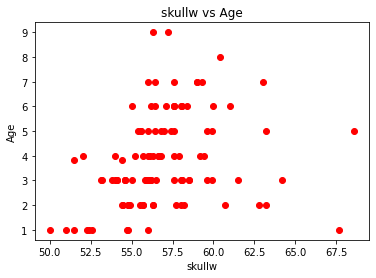

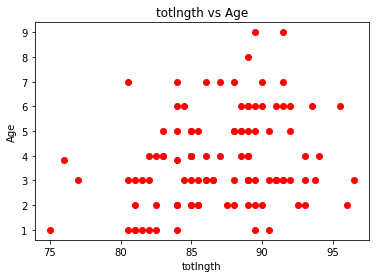

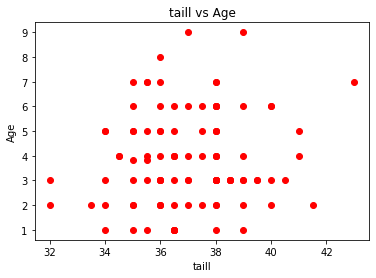

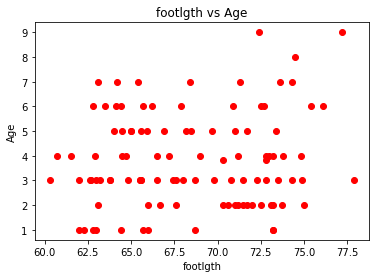

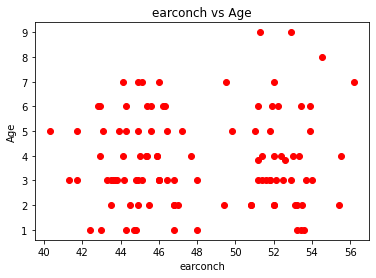

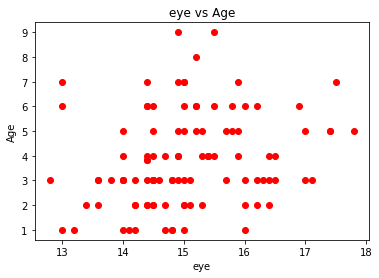

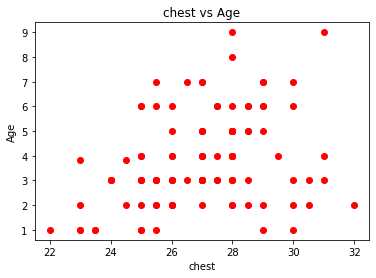

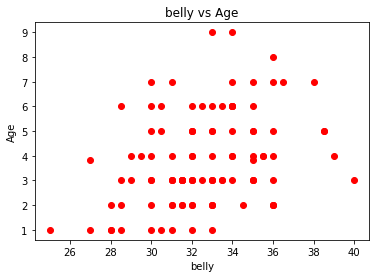

In [6]:
for i in range(0, 13):
    if i != 3:
        plot = plt.scatter(X_total[:, i], X_total[:, 3], color='red')
        plt.title(f'{df.columns[i+1]} vs Age')
        plt.xlabel(df.columns[i+1])
        plt.ylabel('Age')
        plt.show()

## Scatter plots for single features and sex as dependent variable

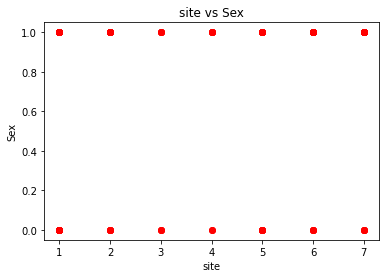

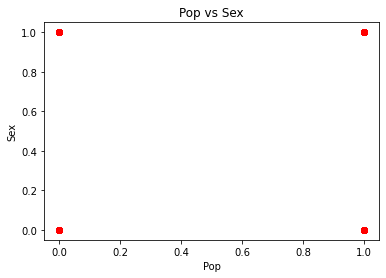

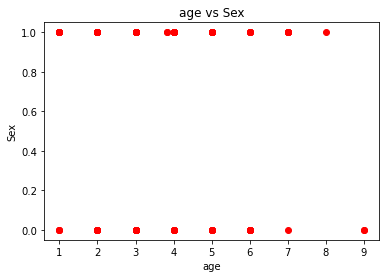

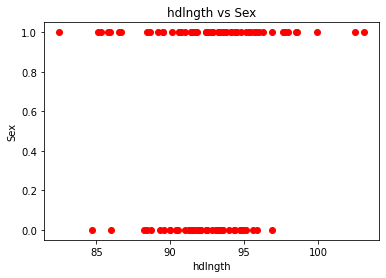

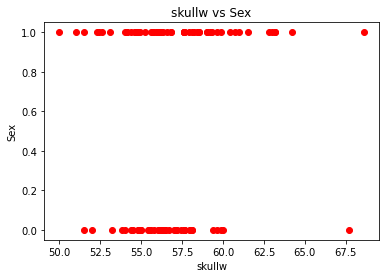

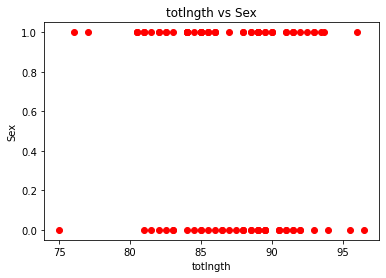

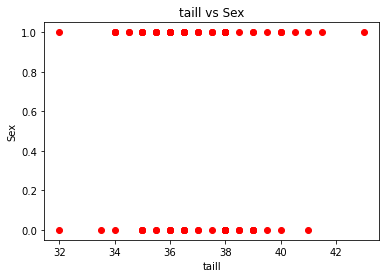

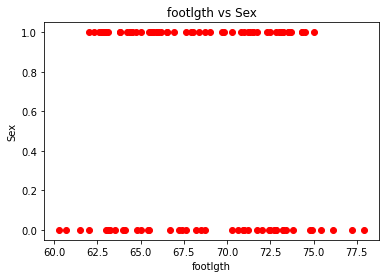

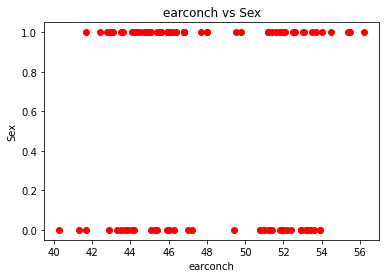

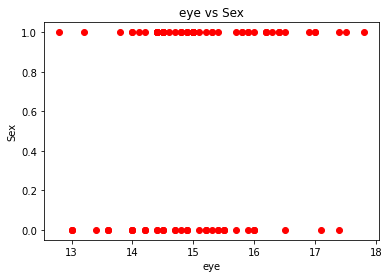

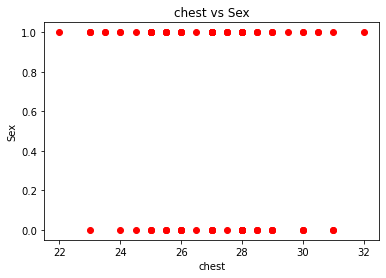

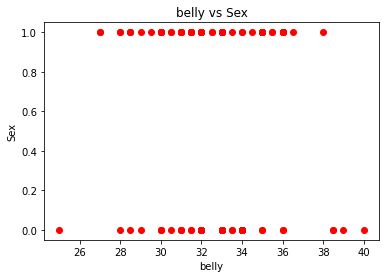

In [7]:
for i in range(0, 13):
    if i != 2:
        plot = plt.scatter(X_total[:, i], X_total[:, 2], color='red')
        plt.title(f'{df.columns[i+1]} vs Sex')
        plt.xlabel(df.columns[i+1])
        plt.ylabel('Sex')
        plt.show()

## Scatter plots for single features and head length as dependent variable

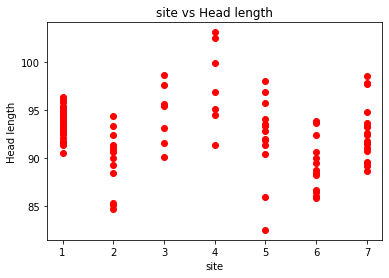

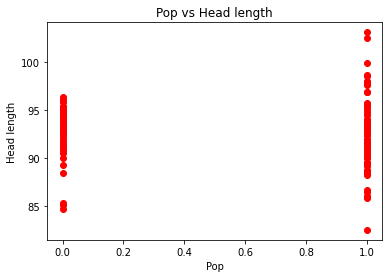

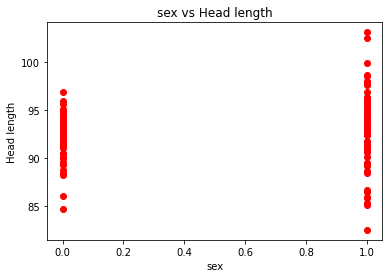

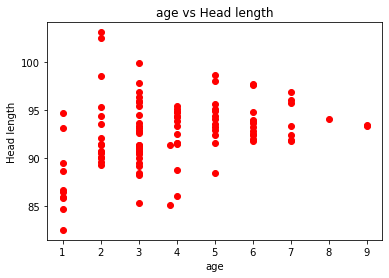

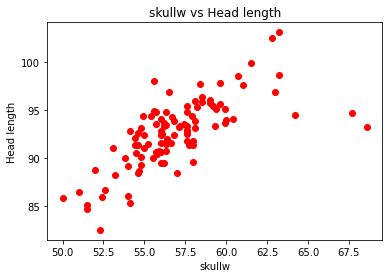

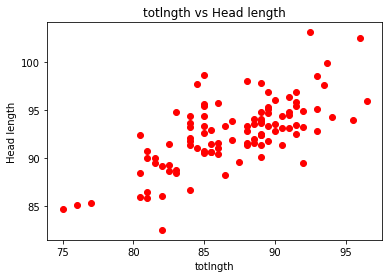

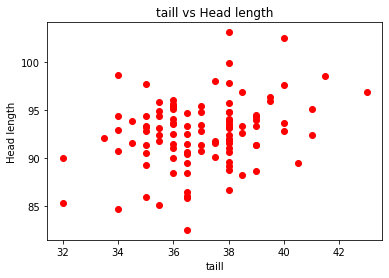

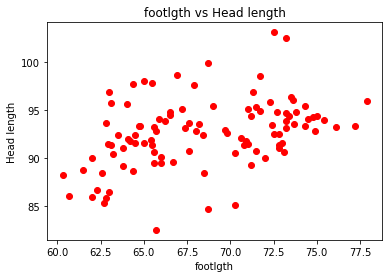

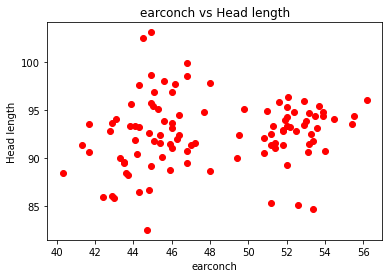

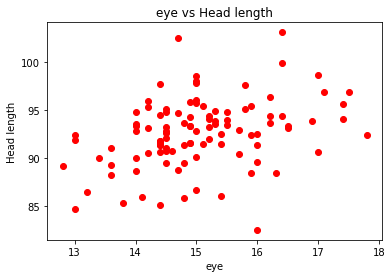

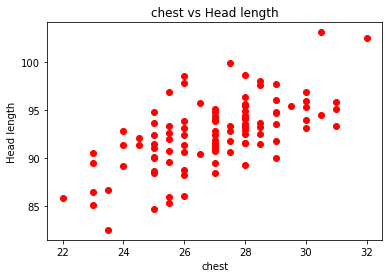

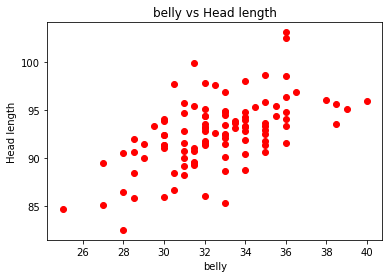

In [8]:
for i in range(0, 13):
    if i != 4:
        plot = plt.scatter(X_total[:, i], X_total[:, 4], color='red')
        plt.title(f'{df.columns[i+1]} vs Head length')
        plt.xlabel(df.columns[i+1])
        plt.ylabel('Head length')
        plt.show()